### Read a 28x28 pixel image of a number
### Serialize the 28 rows into a single row of 1*(28*28) = 1x784

# http://yann.lecun.com/exdb/mnist/

In [26]:
import pandas as pd
import numpy as np
import seaborn as sns
import random as ran
import csv
import matplotlib.pyplot as plt
%matplotlib inline

In [1]:
def convert(IMAGEFILE, LABELFILE, OUTPUTFILE, n):
    f = open(IMAGEFILE, "rb")
    o = open(OUTPUTFILE, "w")
    l = open(LABELFILE, "rb")

    f.read(16)
    l.read(8)
    images = []

    for i in range(n):
        image = [ord(l.read(1))] ## Look here! ord() function does the magic
        for j in range(28*28):
            image.append(ord(f.read(1))) ## Look here! ord() function does the magic
        images.append(image)

    for image in images:
        o.write(",".join(str(pix) for pix in image)+"\n")
    f.close()
    o.close()
    l.close()

In [2]:
convert("train-images-idx3-ubyte", "train-labels-idx1-ubyte", "train.csv", 60000)

In [4]:
convert("C:/xlxlxlx/lxxl/t10k-images-idx3-ubyte", "t10k-labels-idx1-ubyte", "test.csv", 10000)

In [10]:
TEST = pd.read_csv('test.csv', header=None)

In [12]:
TEST.shape

(10000, 785)

In [13]:
TEST.head()

,0,1,2,3,4,5,6,7,8,9,...,775,776,777,778,779,780,781,782,783,784
0,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [14]:
TEST.head().iloc[0:1]

,0,1,2,3,4,5,6,7,8,9,...,775,776,777,778,779,780,781,782,783,784
0,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [23]:
def visualizeFile(csvFile):
    with open(csvFile, 'r') as csv_file:
        for data in csv.reader(csv_file):
            # The first column is the label
            label = data[0]
            # The rest of columns are pixels
            pixels = data[1:]
                    
            # Make those columns into a array of 8-bits pixels
            # This array will be of 1D with length 784
            # The pixel intensity values are integers from 0 to 255
            pixels = np.array(pixels, dtype='uint8')
            
            # Reshape the array into 28 x 28 array (2-dimensional array)
            pixels = pixels.reshape((28, 28))
            
            # Plot
            plt.title('Label is {label}'.format(label=label))
            plt.imshow(pixels, cmap='gray')
            plt.show()
            
            break # This stops the loop, I just want to see one

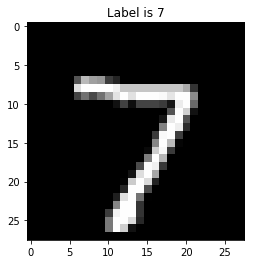

In [24]:
visualizeFile('test.csv')